Nama    : Randy Revaldo Pratama<br/>
NIM     : 13222012 <br/>
Data Analysis dengan python sesuai dengan dataset yang didapatkan

In [235]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st 
import statsmodels.api
import statsmodels.stats as sm

In [106]:
df = pd.read_excel('13222012.xlsx')
df.head()

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,32,S1,Karyawan Swasta,> Rp 10 juta,Tangerang,1600%,Sama saja,sama aja,Mobile Banking,...,NaN,NaN,NaN,menggunakan fitur Paylater,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,Saldo eMoney/ eWallet berkurang tanpa melakuka...
1,Pria,14,SMP,Pelajar / Mahasiswa,< Rp 2 juta,Depok,NaN,Ya,Akses media sosial,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
2,Wanita,18,S1,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,NaN,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
3,Wanita,21,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Purbalingga,600%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
4,Pria,19,S1,Pelajar / Mahasiswa,< Rp 2 juta,Bekasi,NaN,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nomor 1

### a. 

In [107]:
print("row =", len(df))
print("column =",len(df.columns))

row = 283
column = 150


<hr/>

### b.

In [108]:
df.isna().sum()

Jenis Kelamin                 0
Usia                          0
Pendidikan Terakhir           0
Pekerjaan                     0
Penghasilan per Bulan         0
                           ... 
keluhan_belanja_online_2    198
keluhan_belanja_online_3    207
keluhan_belanja_online_4    232
keluhan_belanja_online_5    252
keluhan_belanja_online_6    265
Length: 150, dtype: int64

Jumlah masing - masing data kosong pada setiap kolom dapat dilihat di atas, dengan jumlah total dari keseluruhan data adalah sebagai berikut

In [109]:
df.isna().sum().sum()  

24107

<hr/>

# Nomor 2

### Grafik pertama

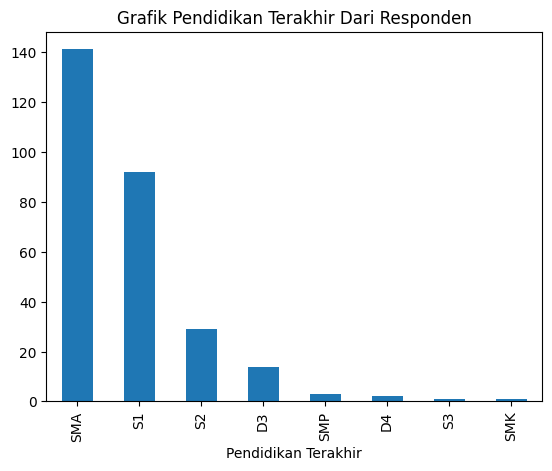

In [110]:
df['Pendidikan Terakhir'].value_counts().plot(kind="bar")
plt.title('Grafik Pendidikan Terakhir Dari Responden')
plt.show()

Mayoritas dari responden memiliki pendidikan terakhir yaitu SMA, dilanjutkan dengan S1 sebagai terbanyak kedua. Dari data tersebut, dapat disimpulkan bahwa kemungkinan besar responden memiliki usia yang merupakan usia ketika menduduki S1, dari rentang umur 19 tahun sampai 23 tahun

<hr/>

### Grafik Kedua

In [111]:
# Ada data yang error pada data usia yaitu data berikut
df.loc[df['Usia'] == 1984]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
150,Wanita,1984,SMA,Ibu Rumah Tangga,Rp 2 juta – Rp 5 juta,Jakarta,NaN,Sama saja,NaN,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN


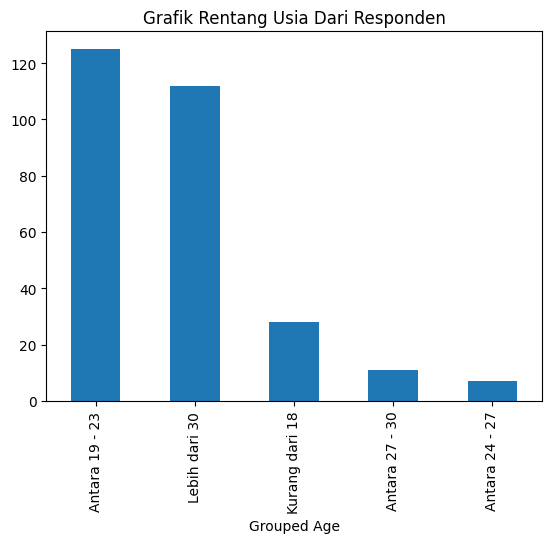

In [112]:

# Data yang error tersebut merupakan data pada kolom Usia, tetapi responden memasukkan nilai berupa tahun, yang kemungkinan besar merupakan tahun kelahirannya sehingga saya memperbaikinya dengan mengganti nilai kolom tersebut menjadi nilai usia sekarang berdassarkan tahun tersebut
df.loc[df['Usia'] == 1984, 'Usia'] = (2023 - 1984)

df['Grouped Age'] = pd.cut(df['Usia'], bins=[0, 18, 23, 27, 30, 200], right=True, labels=['Kurang dari 18', 'Antara 19 - 23', 'Antara 24 - 27','Antara 27 - 30','Lebih dari 30'])
df['Grouped Age'].value_counts().plot(kind='bar')
plt.title('Grafik Rentang Usia Dari Responden')
plt.show()

Sesuai asumsi sebelumnya, mayoritas dari responden memiliki usia pada rentang 19 tahun - 23 tahun yang memiliki pendidikan terakhir yaitu SMA. Kemudian responden terbanyak kedua berasal dari orang yang memilki usia yang lebih dari 30 tahun, yang merupakan orang yang sudah bekerja dan mencari uang sendiri. Hal ini cukup normal karena pengguna uang elektronik, tempat belanja online, ataupun mobile banking adalah orang yang kemungkinan besar telah menduduki pendidikan S1 atau diatasnya. Bagi mahasiswa S1, banyak dari mahasiswa tersebut merupakan mahasiswa yang merantau ataupun cukup jauh dari tempat tinggal asalnya, sehingga uang elektronik, mobile banking, dan hal - hal yang mirip seperti itu telah menjadi sebuah kebutuhan untuk dimiliki oleh mahasiswa sehingga memudahkan mereka dalam keuangan sehari - hari, sedangkan untuk umur di atasnya telah menjadi sebuah hal yang wajar dimiliki sebagai kebutuhan pekerjaan ataupun semacamnya. 

<hr/>

### Grafik Ketiga

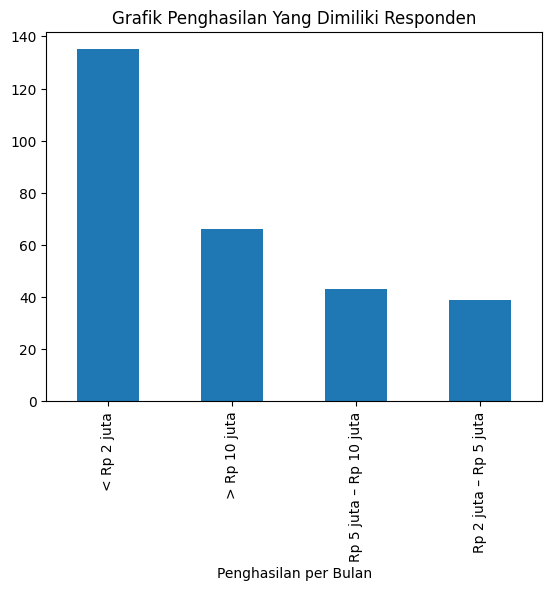

In [113]:
df['Penghasilan per Bulan'].value_counts().plot(kind="bar")
plt.title('Grafik Penghasilan Yang Dimiliki Responden')
plt.show()

Mayoritas dari responden memiliki penghasilan kurang dari 2 juta. Dilihat dari variasi pekerjaan responden yang ada, yang mendominasi nilai ini adalah responden yang memiliki pekerjaan sebagai Pelajar/Mahasiswa, sesuai dengan jumlah terbanyak responden juga berasal dari umur 19 - 23 tahun yang merupakan umur Pelajar/Mahasiswa. Untuk pekerjaan lainnya memiliki penghasilan yang cukup bervariasi yang dapat dilihat dari grafik di atas.

<hr/>

### Grafik keempat

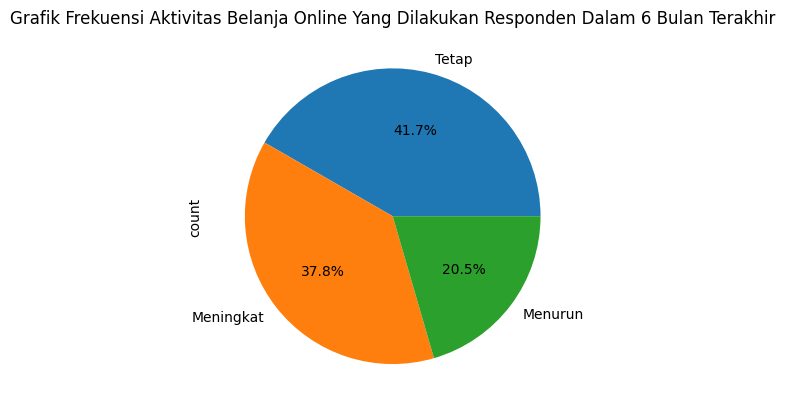

In [114]:
df['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title('Grafik Frekuensi Aktivitas Belanja Online Yang Dilakukan Responden Dalam 6 Bulan Terakhir')
plt.show()

<p>Dalam 6 bulan terakhir, terdapat 37,8% orang yang frekuensi belanja onlinenya meningkat, serta 41,7% orang memiliki frekuensi belanja online yang tetap. Hal ini didukung dengan perkembangan teknologi yang ada sekarang, ditambah dengan pengalaman saat pandemi Covid-19 2020 lalu, yang membuat belanja online cukup banyak diminati oleh mayoritas orang sekarang karena lebih praktis dan cukup mudah untuk dilakukan oleh orang dari semua kalangan.</p>

<hr/>

### Grafik Kelima

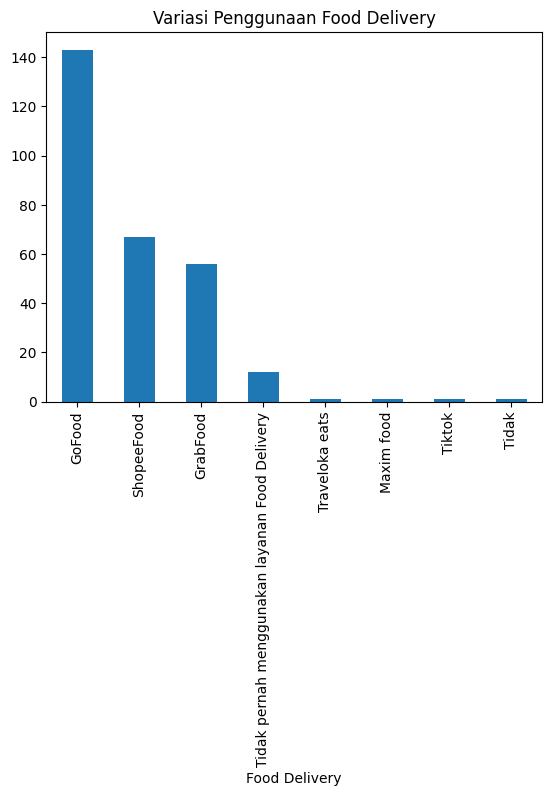

In [115]:
df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'].value_counts().plot(kind='bar')
plt.title("Variasi Penggunaan Food Delivery")
plt.xlabel("Food Delivery")
plt.show()

<p>Responden Banyak Menggunakan Go Food Sebagai opsi untuk Food Delivery, dilanjutkan dengan Shopee Food dan Juga Grab Food. Ketiga aplikasi tersebut adalah aplikasi yang cukup banyak menawarkan promo dalam penggunaan sehari - hari, sehingga cukup normal jika ketiga aplikasi tersebut mendominasi food delivery yang biasa digunakan oleh mayoritas orang. Untuk aplikasi sisanya seperti Traveloka Eats dan Maxim Food, masih kurang memiliki popularitas dibandingkan ketiga aplikasi tersebut, sedangkan untuk Tiktok adalah aplikasi yang banyak orang memakai untuk sosial medianya, bukan untuk Food Delivery nya </p>

<hr/>

### Grafik Keenam

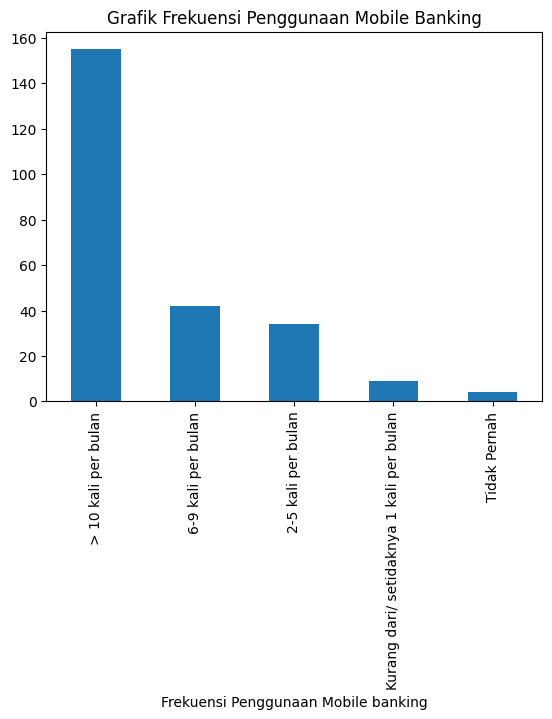

In [116]:
df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'].value_counts().plot(kind="bar")
plt.xlabel("Frekuensi Penggunaan Mobile banking")
plt.title("Grafik Frekuensi Penggunaan Mobile Banking")
plt.show()

<p>Dari grafik diatas, diketahui bahwa frekuensi terdapat lebih dari 140 orang yang menggunakan mobile banking lebih dari 10kali perbulan, dan angka tersebut adalah angka yang mendominasi dari jumlah responden yang ada. Dapat disimpulkan bahwa mobile banking menjadi opsi utama dari penggunaan Channel Bank yang dilakukan oleh responden yang ada.</p>

<hr/>

# Nomor 3

### A.

<hr/>

##### Variabel 1 : Confidence Interval untuk Proporsi Pemakai Layanan Aktif Mobile Banking

In [117]:
# Membuat Dataframe untuk layanan aktif
df_layanan_aktif = pd.DataFrame([['Mobile Banking', df['layanan_aktif_1'].value_counts()['Mobile Banking']],
                                 ['ATM', df['layanan_aktif_2'].value_counts()['ATM']],
                                 ['Kartu Kredit',df['layanan_aktif_3'].value_counts()['Kartu Kredit']],
                                 ['Internet Banking',df['layanan_aktif_4'].value_counts()['Internet Banking']],
                                 ['Datang ke Kantor Cabang',df['layanan_aktif_5'].value_counts()['Datang ke Kantor Cabang']],
                                 ['SMS Banking', df['layanan_aktif_6'].value_counts()['SMS Banking']]]
                                 , columns=['Jenis Layanan', 'Jumlah Pemakai'])

df_layanan_aktif

,Jenis Layanan,Jumlah Pemakai
0,Mobile Banking,239
1,ATM,160
2,Kartu Kredit,26
3,Internet Banking,63
4,Datang ke Kantor Cabang,18
5,SMS Banking,9


In [118]:
(lbMobileBanking, ubMobileBanking) = sm.proportion.proportion_confint(
    count = df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'],
    nobs = df_layanan_aktif['Jumlah Pemakai'].sum(),
    alpha=0.05,
    method='normal')
print(f"Lower Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking : {lbMobileBanking[0] : .4f}")
print(f"Upper Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking : {ubMobileBanking[0] : .4f}")

Lower Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking :  0.4210
Upper Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking :  0.5071


<hr/>

##### Variabel 2 : Confidence Interval untuk Proporsi Pelajar / Mahasiswa

In [119]:
#Membuat DataFrame mengenai frekuensi pekerjaan dari responden
value_count_pelajar_mahasiswa = df['Pekerjaan'].value_counts()
df_Pekerjaan = pd.DataFrame({'Frekuensi Dari Pekerjaan Responden' : value_count_pelajar_mahasiswa})
df_Pekerjaan

,Frekuensi Dari Pekerjaan Responden
Pekerjaan,
Pelajar / Mahasiswa,146
Karyawan Swasta,59
Ibu Rumah Tangga,24
Pegawai Negeri,21
Pengusaha,11
"Profesional ( Dokter, Dosen, Pengacara, dll)",9
BUMD,2
Wiraswasta,2
Pensiun,1


In [120]:
# Confidence Interval untuk Proporsi pekerjaan sebagai Pelajar/Mahasiswa
(lbMahasiswa, ubMahasiswa) = sm.proportion.proportion_confint(
    count = df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'].loc[df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'] == 146], 
    nobs=df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'].sum(), 
    alpha = 0.05, 
    method='normal')
print(f"Lower Bound of 95% Confidence Interval for Proportion of Pelajar/Mahasiswa : {lbMahasiswa['Pelajar / Mahasiswa'] : .4f}")
print(f"Upper Bound of 95% Confidence Interval for Proportion of Pelajar/Mahasiswa : {ubMahasiswa['Pelajar / Mahasiswa'] : .4f}")


Lower Bound of 95% Confidence Interval for Proportion of Pelajar/Mahasiswa :  0.4577
Upper Bound of 95% Confidence Interval for Proportion of Pelajar/Mahasiswa :  0.5741


<hr/>

##### Variabel 3 : Confidence Interval untuk Proporsi Bank BCA

In [121]:
# Membuat Dataframe untuk Bank 
df_bank = pd.DataFrame([['Bank BNI', df['bank_1'].value_counts()['Bank BNI']],
                                 ['Bank Mandiri', df['bank_2'].value_counts()['Bank Mandiri']],
                                 ['Bank BCA',df['bank_3'].value_counts()['Bank BCA']],
                                 ['Bank CIMB Niaga',df['bank_4'].value_counts()['Bank CIMB Niaga']],
                                 ['Bank BRI',df['bank_5'].value_counts()['Bank BRI']],
                                 ['Bank BTN', df['bank_6'].value_counts()['Bank BTN']],
                                 ['Bank Permata', df['bank_7'].value_counts()['Bank Permata']]]
                                 , columns=['Bank', 'Jumlah Pemakai'])
df_bank

,Bank,Jumlah Pemakai
0,Bank BNI,55
1,Bank Mandiri,82
2,Bank BCA,168
3,Bank CIMB Niaga,21
4,Bank BRI,61
5,Bank BTN,7
6,Bank Permata,9


In [122]:
(lbBank, ubBank) = sm.proportion.proportion_confint(
    count = df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'],
    nobs = df_bank['Jumlah Pemakai'].sum(),
    alpha=0.05,
    method='normal')
print(f"Lower Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking : {lbBank[2] : .4f}")
print(f"Upper Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking : {ubBank[2] : .4f}")

Lower Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking :  0.3687
Upper Bound of 95% Confidence Interval for Proportion of Layanan Aktif Mobile Banking :  0.4650


<hr/>

### B.

alpha = 5%

<hr/>

##### Variabel 1 : Proporsi Pelajar/Mahasiswa

H0 : Proporsi Pelajar/Mahasiswa = 50% <br/>
H1 : Proporsi Pelajar/Mahasiswa != 50%

In [123]:
(pelajar_mahasiswa_zscore, pelajar_mahasiswa_pvalue) = sm.proportion.proportions_ztest(
    count=df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'].loc[df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'] == 146], 
    nobs=df_Pekerjaan['Frekuensi Dari Pekerjaan Responden'].sum(), 
    value=0.5, 
    alternative='two-sided', 
    prop_var=0.5)
print(f"Z Score untuk proporsi pelajar/mahasiswa adalah {pelajar_mahasiswa_zscore[0] : .5f}")
print(f"P Value untuk proporsi Pelajar/Mahasiswa adalah {pelajar_mahasiswa_pvalue[0] : .5f}")

Z Score untuk proporsi pelajar/mahasiswa adalah  0.53499
P Value untuk proporsi Pelajar/Mahasiswa adalah  0.59265


KESIMPULAN<br/>
Karena P value > alpha, maka H0 gagal ditolak (Proporsi Pelajar/Mahasiswa = 50%)

<hr/>

##### Variabel 2 : Proporsi Pemakai Layanan Aktif Mobile Banking

H0 : Proporsi Pemakai Layanan Aktif Mobile Banking = 80% <br/>
H1 : Proporsi Pemakai Layanan Aktif Mobile Banking != 80%

In [124]:
(mobile_banking_zscore, mobile_banking_pvalue) = sm.proportion.proportions_ztest(
    count=df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'], 
    nobs= df_layanan_aktif['Jumlah Pemakai'].sum(), 
    value=0.8, 
    alternative='two-sided',
    prop_var=0.8)
print(f"Z Score untuk proporsi pengguna layanan aktif Mobile Banking adalah {mobile_banking_zscore[0] : .4f}")
print(f"P Value untuk proporsi pengguna layanan aktif Mobile Banking adalah {mobile_banking_pvalue[0] : .4f}")

Z Score untuk proporsi pengguna layanan aktif Mobile Banking adalah -19.0582
P Value untuk proporsi pengguna layanan aktif Mobile Banking adalah  0.0000


KESIMPULAN <br/>
Karena P value < alpha, maka H0 ditolak (Pemakai Layanan Aktif Mobile Banking != 80%)

<hr/>

##### Variabel 3 : Proporsi Bank BCA

H0 : Proporsi Bank BCA = 70% <br/>
H1 : Proporsi Bank BCA < 70%

In [125]:
(bank_bca_zscore, bank_bca_pvalue) = sm.proportion.proportions_ztest(
    count=df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'], 
    nobs=df_bank['Jumlah Pemakai'].sum(), 
    value=0.7, 
    alternative='smaller',
    prop_var=0.7)
print(f"Z Score untuk proporsi pengguna layanan aktif Mobile Banking adalah {bank_bca_zscore[0] : .4f}")
print(f"P Value untuk proporsi pengguna layanan aktif Mobile Banking adalah {bank_bca_pvalue[0] : .4f}")

Z Score untuk proporsi pengguna layanan aktif Mobile Banking adalah -12.4029
P Value untuk proporsi pengguna layanan aktif Mobile Banking adalah  0.0000


KESIMPULAN <br/>
Karena P value < alpha, maka H0 ditolak (Proporsi Bank BCA < 70%)

<hr/>

### C.

Alpha = 5%

H0 : Data Distribution = Uniform Distribution <br/>
H1 : Data Distribution != Uniform Distribution

<hr/>

##### Variabel 1 : Goodness Of Fit Test untuk Penggunaan Layanan Aktif

In [126]:
df_layanan_aktif

,Jenis Layanan,Jumlah Pemakai
0,Mobile Banking,239
1,ATM,160
2,Kartu Kredit,26
3,Internet Banking,63
4,Datang ke Kantor Cabang,18
5,SMS Banking,9


In [127]:
# Karena H0 : Data distribution = uniform distribution, dibuat uniform dataset berdasarkan mean yang didapat
layanan_aktif_expected = [df_layanan_aktif['Jumlah Pemakai'].mean() for i in range(df_layanan_aktif['Jumlah Pemakai'].count())]
print(layanan_aktif_expected)

[85.83333333333333, 85.83333333333333, 85.83333333333333, 85.83333333333333, 85.83333333333333, 85.83333333333333]


In [128]:
layanan_aktif_chi_squared_test, layanan_aktif_p_value = st.chisquare(df_layanan_aktif['Jumlah Pemakai'],layanan_aktif_expected)
print(f"Chi Squared Test Untuk Layanan Aktif : {layanan_aktif_chi_squared_test : .4f}")
print(f"P Value Untuk Layanan Aktif : {layanan_aktif_p_value :.4f}")

Chi Squared Test Untuk Layanan Aktif :  507.5748
P Value Untuk Layanan Aktif : 0.0000


KESIMPULAN <br/>
Karena P value < Alpha, maka H0 ditolak (Data tidak terdistribusi secara uniform)

<hr/>

##### Variabel 2 : Goodness Of Fit Test Untuk Bank

In [129]:
df_bank

,Bank,Jumlah Pemakai
0,Bank BNI,55
1,Bank Mandiri,82
2,Bank BCA,168
3,Bank CIMB Niaga,21
4,Bank BRI,61
5,Bank BTN,7
6,Bank Permata,9


In [130]:
# Expected value untuk uniform distribution
bank_expected = [df_bank['Jumlah Pemakai'].mean() for i in range(df_bank['Jumlah Pemakai'].count())]
print(bank_expected)

[57.57142857142857, 57.57142857142857, 57.57142857142857, 57.57142857142857, 57.57142857142857, 57.57142857142857, 57.57142857142857]


In [131]:
bank_chi_squared_test, bank_p_value = st.chisquare(df_bank['Jumlah Pemakai'],bank_expected)
print(f"Chi Squared Test Untuk Layanan Aktif : {bank_chi_squared_test : .4f}")
print(f"P Value Untuk Layanan Aktif : {bank_p_value :.4f}")

Chi Squared Test Untuk Layanan Aktif :  331.1315
P Value Untuk Layanan Aktif : 0.0000


KESIMPULAN <br/>
Karena P value < Alpha, maka H0 ditolak (Data tidak terdistribusi secara uniform)

<hr/>

# Nomor 4

### A.

<hr/>

##### Variabel 1 : Proporsi Bank BCA - Proporsi Layanan Aktif Mobil Banking

P1 : Proporsi Bank BCA <br/>
P2 : Proporsi Layanan Aktif Mobile Banking

In [132]:
df_bank

,Bank,Jumlah Pemakai
0,Bank BNI,55
1,Bank Mandiri,82
2,Bank BCA,168
3,Bank CIMB Niaga,21
4,Bank BRI,61
5,Bank BTN,7
6,Bank Permata,9


In [133]:
df_layanan_aktif

,Jenis Layanan,Jumlah Pemakai
0,Mobile Banking,239
1,ATM,160
2,Kartu Kredit,26
3,Internet Banking,63
4,Datang ke Kantor Cabang,18
5,SMS Banking,9


In [134]:
a4_prop_lb, a4_prop_ub = sm.proportion.confint_proportions_2indep(
    count1=df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'][2],
    nobs1=df_bank['Jumlah Pemakai'].sum(),
    count2=df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'],
    nobs2=df_layanan_aktif['Jumlah Pemakai'].sum(),
    compare='diff', # p1 - p2
    method='wald', # Normal Approximation
    alpha=(1-0.95))
print(f"Lower bound untuk PbankBCA - Pmobile Banking : {a4_prop_lb[0] : .4f}")
print(f"Upper bound untuk PbankBCA - Pmobile Banking : {a4_prop_ub[0] : .4f}")

Lower bound untuk PbankBCA - Pmobile Banking : -0.1118
Upper bound untuk PbankBCA - Pmobile Banking :  0.0174


<hr/>

##### Variabel 2 : Proporsi Bank BCA - Proporsi Bank Mandiri

P1 : Proporsi Bank BCA <br/>
P2 : Proporsi Bank Mandiri

In [135]:
df_bank

,Bank,Jumlah Pemakai
0,Bank BNI,55
1,Bank Mandiri,82
2,Bank BCA,168
3,Bank CIMB Niaga,21
4,Bank BRI,61
5,Bank BTN,7
6,Bank Permata,9


In [136]:
b4_prop_lb, b4_prop_ub = sm.proportion.confint_proportions_2indep(
    count1=df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'][2],
    nobs1=df_bank['Jumlah Pemakai'].sum(),
    count2=df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank Mandiri'][1],
    nobs2=df_bank['Jumlah Pemakai'].sum(),
    compare='diff', # p1 - p2
    method='wald', # Normal Approximation
    alpha=(1-0.95))
print(f"Lower bound untuk PbankBCA - Pmobile Banking : {b4_prop_lb : .4f}")
print(f"Upper bound untuk PbankBCA - Pmobile Banking : {b4_prop_ub : .4f}")

Lower bound untuk PbankBCA - Pmobile Banking :  0.1513
Upper bound untuk PbankBCA - Pmobile Banking :  0.2755


<hr/>

##### Variabel 3 : Proporsi Mobile Banking - Proporsi ATM

P1 : Proporsi Mobile Banking <br/>
P2 : Proporsi ATM

In [137]:
df_layanan_aktif

,Jenis Layanan,Jumlah Pemakai
0,Mobile Banking,239
1,ATM,160
2,Kartu Kredit,26
3,Internet Banking,63
4,Datang ke Kantor Cabang,18
5,SMS Banking,9


In [138]:
c4_prop_lb, c4_prop_ub = sm.proportion.confint_proportions_2indep(
    count1=df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'][0],
    nobs1=df_layanan_aktif['Jumlah Pemakai'].sum(),
    count2=df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'ATM'][1],
    nobs2=df_layanan_aktif['Jumlah Pemakai'].sum(),
    compare='diff', # p1 - p2
    method='wald', # Normal Approximation
    alpha=(1-0.95))
print(f"Lower bound untuk PbankBCA - Pmobile Banking : {c4_prop_lb : .4f}")
print(f"Upper bound untuk PbankBCA - Pmobile Banking : {c4_prop_ub : .4f}")

Lower bound untuk PbankBCA - Pmobile Banking :  0.0946
Upper bound untuk PbankBCA - Pmobile Banking :  0.2122


<hr/>

### B.

Alpha = 5%

<hr/>

##### Variabel 1 : Proporsi Bank BCA - Proporsi Layanan Aktif Mobile Banking

P1 : Proporsi Bank BCA <br/>
P2 : Proporsi Layanan Aktif Mobile Banking

H0 : P1 - P2 = 0.1<br/>
H1 : P1 - P2 != 0.1

In [139]:
b1_zscore, b1_pvalue = sm.proportion.proportions_ztest(
    count=[df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'][2], df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'][0]], 
    nobs= [df_bank['Jumlah Pemakai'].sum(), df_layanan_aktif['Jumlah Pemakai'].sum()], 
    alternative='two-sided',
    prop_var=0.1)
print(f"Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Mobile Banking adalah {b1_zscore : .4f}")
print(f"P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Mobile Banking adalah {b1_pvalue : .4f}")

Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Mobile Banking adalah -2.3659
P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Mobile Banking adalah  0.0180


KESIMPULAN<br/>
Karena P Value < alpha maka H0 di tolak (P1 - P2 != 0.1)

<hr/>

##### Variabel 2 : Proporsi Bank BCA - Proporsi Bank Mandiri

P1 : Proporsi Bank BCA<br/>
P2 : Proporsi Bank Mandiri

H0 : P1 - P2 = 0.3 <br/>
H1 : P1 - P2 < 0.3

In [140]:
b2_zscore, b2_pvalue = sm.proportion.proportions_ztest(
    count=[df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank BCA'][2], df_bank['Jumlah Pemakai'].loc[df_bank['Bank'] == 'Bank Mandiri'][1]], 
    nobs= [df_bank['Jumlah Pemakai'].sum(), df_bank['Jumlah Pemakai'].sum()], 
    alternative='smaller',
    prop_var=0.3)
print(f"Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah {b2_zscore : .4f}")
print(f"P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah {b2_pvalue : .4f}")

Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah  6.6103
P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah  1.0000


KESIMPULAN<br/>
Karena P Value > alpha maka H0 di gagal ditolak (P1 - P2 = 0.3)

<hr/>

##### Variabel 3 : Proporsi Mobile Banking - Proporsi ATM

P1 : Proporsi Mobile Banking <br/>
P2 : Proporsi ATM

H0 : P1 - P2 = 0.2 <br/>
H1 : P1 - P2 > 0.2

In [141]:
b3_zscore, b3_pvalue = sm.proportion.proportions_ztest(
    count=[df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'Mobile Banking'][0],df_layanan_aktif['Jumlah Pemakai'].loc[df_layanan_aktif['Jenis Layanan'] == 'ATM'][1]], 
    nobs= [df_layanan_aktif['Jumlah Pemakai'].sum(), df_layanan_aktif['Jumlah Pemakai'].sum()], 
    alternative='larger',
    prop_var=0.2)
print(f"Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah {b3_zscore : .4f}")
print(f"P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah {b3_pvalue : .4f}")

Z Score untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah  6.1539
P Value untuk Two Sample for Proportion Difference Proporsi Bank BCA - Proporsi Bank Mandiri adalah  0.0000


KESIMPULAN<br/>
Karena P Value < alpha maka H0 ditolak (P1 - P2 > 0.2)

<hr/>

### C.

H0 : Kedua variabel independen <br/>
H1 : Kedua variabel bergantung satu sama lain

Alpha = 5%

<hr/>

##### Variabel 1 : Independensi Antara Gender Terhadap Penggunaan Bank

In [142]:
# Membuat Dataframe untuk Bank Sesuai Dengan Gender Yang Menggunakan
data_bank_gender = {
    'Bank' : ['Bank BNI','Bank BNI', 'Bank Mandiri','Bank Mandiri', 'Bank BCA','Bank BCA','Bank CIMB Niaga','Bank CIMB Niaga','Bank BRI','Bank BRI','Bank BTN','Bank BTN','Bank Permata','Bank Permata'],
    'Gender' : ['Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita'],
    'Value' : [
        df['bank_1'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank BNI'], df['bank_1'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank BNI'], 
        df['bank_2'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank Mandiri'], df['bank_2'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank Mandiri'], 
        df['bank_3'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank BCA'], df['bank_3'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank BCA'], 
        df['bank_4'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank CIMB Niaga'], df['bank_4'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank CIMB Niaga'], 
        df['bank_5'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank BRI'], df['bank_5'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank BRI'], 
        df['bank_6'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank BTN'], df['bank_6'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank BTN'],  
        df['bank_7'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Bank Permata'], df['bank_7'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Bank Permata'] 
    ]
}
df_bank_gender = pd.DataFrame(data_bank_gender)
df_bank_gender_crosstab = df_bank_gender.pivot(index='Bank',columns='Gender',values='Value')
df_bank_gender_crosstab

Gender,Pria,Wanita
Bank,,
Bank BCA,70,98
Bank BNI,24,31
Bank BRI,26,35
Bank BTN,1,6
Bank CIMB Niaga,12,9
Bank Mandiri,31,51
Bank Permata,7,2


In [143]:
c1_chi2_test, c1_chi2_pvalue, c1_chi2_dof, c1_chi2_expected = st.chi2_contingency(df_bank_gender_crosstab)
print(f"Chi-Squared Test for Independence untuk Variabel Gender Terhadap Bank : {c1_chi2_test : .4f}")
print(f"P Value for Independence untuk Variabel Gender Terhadap Bank : {c1_chi2_pvalue : .4f}")

Chi-Squared Test for Independence untuk Variabel Gender Terhadap Bank :  9.5263
P Value for Independence untuk Variabel Gender Terhadap Bank :  0.1461


KESIMPULAN <br/>
Karena P Value > Alpha, H0 gagal ditolak (Hubungan dari gender terhadap pemilihan penggunaan bank adalah independen (tidak bergantung satu sama lain))

<hr/>

##### Variabel 2 : Independensi Antara Gender Terhadap Penggunaan Layanan Aktif

In [144]:
# Membuat Dataframe untuk Layanan Aktif Sesuai Dengan Gender Yang Menggunakan
data_layanan_gender = {
    'Bank' : ['Mobile Banking','Mobile Banking', 'ATM','ATM', 'Kartu Kredit','Kartu Kredit','Internet Banking','Internet Banking','Datang ke Kantor Cabang','Datang ke Kantor Cabang','SMS Banking','SMS Banking'],
    'Gender' : ['Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita','Pria', 'Wanita'],
    'Value' : [
        df['layanan_aktif_1'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Mobile Banking'], df['layanan_aktif_1'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Mobile Banking'], 
        df['layanan_aktif_2'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['ATM'], df['layanan_aktif_2'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['ATM'], 
        df['layanan_aktif_3'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Kartu Kredit'], df['layanan_aktif_3'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Kartu Kredit'], 
        df['layanan_aktif_4'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Internet Banking'], df['layanan_aktif_4'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Internet Banking'], 
        df['layanan_aktif_5'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['Datang ke Kantor Cabang'], df['layanan_aktif_5'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['Datang ke Kantor Cabang'], 
        df['layanan_aktif_6'].loc[df['Jenis Kelamin'] == 'Pria'].value_counts()['SMS Banking'], df['layanan_aktif_6'].loc[df['Jenis Kelamin'] == 'Wanita'].value_counts()['SMS Banking'] 
    ]
}
df_layanan_gender = pd.DataFrame(data_layanan_gender)

# Membuat crosstab dari dataframe yang telah dibuat
df_layanan_gender_crosstab = df_layanan_gender.pivot(index='Bank',columns='Gender',values='Value')
df_layanan_gender_crosstab

Gender,Pria,Wanita
Bank,,
ATM,72,88
Datang ke Kantor Cabang,5,13
Internet Banking,25,38
Kartu Kredit,15,11
Mobile Banking,109,130
SMS Banking,4,5


In [145]:
c2_chi2_test, c2_chi2_pvalue, c2_chi2_dof, c2_chi2_expected = st.chi2_contingency(df_layanan_gender_crosstab)
print(f"Chi-Squared Test for Independence untuk Variabel Gender Terhadap Bank : {c2_chi2_test : .4f}")
print(f"P Value for Independence untuk Variabel Gender Terhadap Bank : {c2_chi2_pvalue : .4f}")

Chi-Squared Test for Independence untuk Variabel Gender Terhadap Bank :  4.5883
P Value for Independence untuk Variabel Gender Terhadap Bank :  0.4682


KESIMPULAN <br/>
Karena P Value > Alpha, H0 gagal ditolak (Hubungan dari gender terhadap pemilihan penggunaan layanan aktif adalah independen (tidak bergantung satu sama lain))

<hr/>

### D.

H0 : Tidak ada perbedaan antara kedua variabel <br/>
H1 : Ada perbedaan antara kedua variabel

Alpha = 5%

<hr/>

##### Variabel 1 : Homogenitas antara Pendidikan Terakhir dan Penghasilan per Bulan

In [156]:
# Crosstab untuk Pendidikan Terakhir dan Penghasilan per Bulan
df_pendidikan_penghasilan_crosstab = pd.crosstab(df['Pendidikan Terakhir'], df['Penghasilan per Bulan'])
df_pendidikan_penghasilan_crosstab

Penghasilan per Bulan,< Rp 2 juta,> Rp 10 juta,Rp 2 juta – Rp 5 juta,Rp 5 juta – Rp 10 juta
Pendidikan Terakhir,,,,
D3,2,5,1,6
D4,0,0,1,1
S1,21,41,10,20
S2,1,17,2,9
S3,0,1,0,0
SMA,107,2,25,7
SMK,1,0,0,0
SMP,3,0,0,0


In [155]:
d1_chi2_test, d1_chi2_pvalue, d1_chi2_dof, d1_chi2_expected = st.chi2_contingency(df_pendidikan_penghasilan_crosstab)
print(f"Chi-Squared Test for Homogeneity untuk Variabel Pendidikan Terakhir terhadap Penghasilan per Bulan : {d1_chi2_test : .4f}")
print(f"P Value for Homogeneity untuk Variabel Pendidikan Terakhir terhadap Penghasilan per Bulan : {d1_chi2_pvalue : .4f}")

Chi-Squared Test for Homogeneity untuk Variabel Pendidikan Terakhir terhadap Penghasilan per Bulan :  154.1641
P Value for Homogeneity untuk Variabel Pendidikan Terakhir terhadap Penghasilan per Bulan :  0.0000


KESIMPULAN <br/>
Karena P Value < Alpha, H0 ditolak (Hubungan dari Pendidikan terakhir dan Penghasilan per Bulan tidak homogen)

<hr/>

##### Variabel 2 : Homogenitas antara Usia dan Peningkatan Aktivitas Online

In [157]:
# Crosstab untuk Usia dan Peningkatan Aktivitas Online
df_usia_aktivitasOnline_crosstab = pd.crosstab(df['Usia'], df['Aktivitas Online Meningkat'])
df_usia_aktivitasOnline_crosstab

Aktivitas Online Meningkat,Sama saja,Tidak,Ya
Usia,,,
14,0,0,2
15,1,1,0
17,2,1,1
18,3,1,16
19,25,10,29
20,14,2,19
21,8,2,5
22,3,1,4
23,1,0,2


In [159]:
d2_chi2_test, d2_chi2_pvalue, d2_chi2_dof, d2_chi2_expected = st.chi2_contingency(df_usia_aktivitasOnline_crosstab)
print(f"Chi-Squared Test for Homogeneity untuk Variabel Usia terhadap Aktivitas Online : {d2_chi2_test : .4f}")
print(f"P Value for Homogeneity untuk Variabel Usia terhadap Aktivitas Online : {d2_chi2_pvalue : .4f}")

Chi-Squared Test for Homogeneity untuk Variabel Usia terhadap Aktivitas Online :  107.9791
P Value for Homogeneity untuk Variabel Usia terhadap Aktivitas Online :  0.0729


KESIMPULAN <br/>
Karena P Value > Alpha, H0 gagal ditolak (Hubungan dari Usia dan Aktivitas Online Homogen)

<hr/>

# Nomor 5

### Insight 1

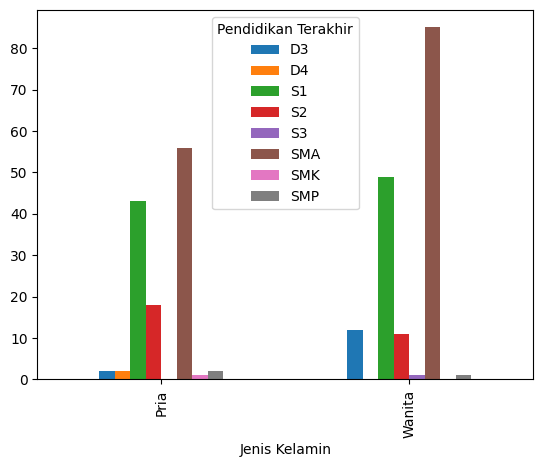

In [163]:
pd.crosstab(df['Jenis Kelamin'], df['Pendidikan Terakhir']).plot(kind='bar')
plt.show()


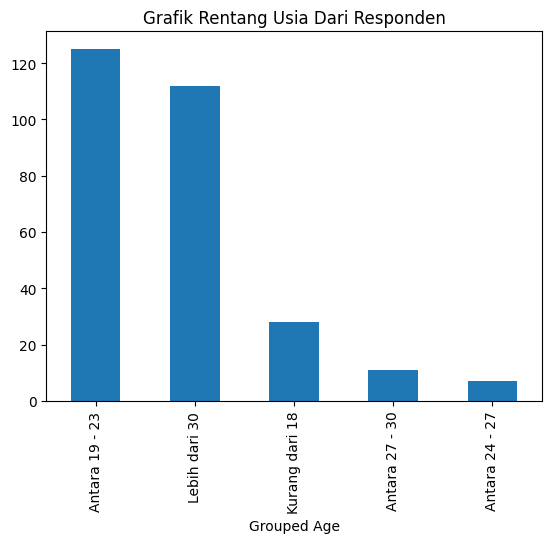

In [175]:
df['Grouped Age'].value_counts().plot(kind='bar')
plt.title('Grafik Rentang Usia Dari Responden')
plt.show()

<p>Jumlah responden wanita lebih banyak dari responden pria pada sampel ini. Pada masing - masing responden juga, pendidikan terakhir paling banyak didapatkan yaitu SMA. Jika dilihat dari persebaran rentang usia responden, hal ini cukup normal karena mayoritas responden memiliki rentang usia dari 19 tahun - 23 tahun yang kebanyakkan usia tersebut adalah usia saat menduduki bangku kuliah.<p/>

<hr/>

### Insight 2

In [178]:
pd.crosstab(df['Pekerjaan'], df['Penghasilan per Bulan'])

Penghasilan per Bulan,< Rp 2 juta,> Rp 10 juta,Rp 2 juta – Rp 5 juta,Rp 5 juta – Rp 10 juta
Pekerjaan,,,,
BUMD,0,0,0,2
Ibu Rumah Tangga,6,8,6,4
Karyawan BUMD,0,0,0,1
Karyawan BUMN,0,1,0,0
Karyawan Swasta,2,37,8,12
Pegawai BUMN,0,1,0,0
Pegawai Negeri,0,6,3,12
Pelajar / Mahasiswa,125,1,18,2
Peneliti,0,1,0,0


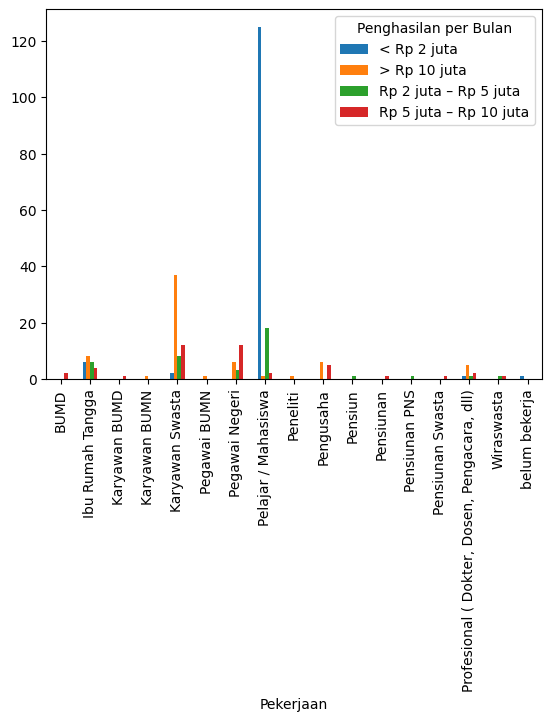

In [177]:
pd.crosstab(df['Pekerjaan'], df['Penghasilan per Bulan']).plot(kind='bar')
plt.show()

<p>Mayoritas responden adalah pelajar/mahasiswa, dan belum bekerja untuk mencari uang. Dapat dilihat dari grafik dan tabel yang ada, pada grafik pelajar/mahasiswa, terdapat bar yang menjulang ke atas yang menunjukkan jumlah orang yang memiliki gaji kurang dari 2 juta. Responden terbanyak kedua datang dari orang yang memiliki usia lebih dari 30 tahun, yang seharusnya usia yang sudah bekerja. Jumlah terbanyak dalam gaji selanjutnya datang dari karyawan swasta yang memiliki gaji lebih dari 10 juta. Persebaran ini cukup wajar untuk didapatkan karena gaji yang didapatkan akan sesuai dengan pekerjaan yang dimiliki<p/>

In [181]:
no5_2_chi2_test, no5_2_chi2_pvalue, no5_2_chi2_dof, no5_2_chi2_expected = st.chi2_contingency(pd.crosstab(df['Pekerjaan'], df['Penghasilan per Bulan']))
print(f"Chi-Squared Test for Independence untuk Variabel Pekerjaan dan Penghasilan : {no5_2_chi2_test : .4f}")
print(f"P Value for Independence untuk Variabel Pekerjaan dan Penghasilan : {no5_2_chi2_pvalue : .4f}")

Chi-Squared Test for Independence untuk Variabel Pekerjaan dan Penghasilan :  280.8351
P Value for Independence untuk Variabel Pekerjaan dan Penghasilan :  0.0000


<p>Pada test chi-squared for independence, akan didapatkan nilai p-value berupa 0 sehingga dengan alpha sebesar 5%, p-value tersebut akan kurang dari alpha dan menunjukkan bahwa kedua variabel bergantung satu sama lain.<p/>

<hr/>

### Insight 3

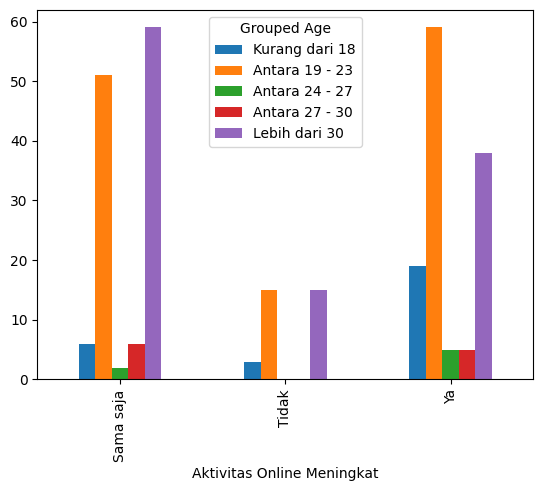

In [186]:
pd.crosstab(df['Aktivitas Online Meningkat'],df['Grouped Age']).plot(kind='bar')
plt.show()

<p>Mayoritas orang memiliki aktivitas online yang cukup meningkat pada berbagai rentang usia sesuai dengan grafik di atas, terutama pada rentang usia 19 - 23 tahun. Selain itu, juga banyak orang yang tidak memiliki peningkatan ataupun penurunan aktivitas online, sehingga menimbulkan 2 asumsi, yaitu aktivitas online sebelumnya telah cukup besar, ataupun aktivitas online sebelumnya emang tidak terlalu banyak. Jika dilihat dari record sebelumnya, yaitu semua hal menjadi online karena pandemi COVID-19, asumsi pertama akan memiliki peluang lebih besar untuk terjadi karena persekolahan dan kerja dilakukan secara daring pada masa itu.<p/>

<hr/>

### Insight 4

In [189]:
df['Aktivitas yang Meningkat dalam 3 Bulan Terakhir'].value_counts()

Aktivitas yang Meningkat dalam 3 Bulan Terakhir
Akses media sosial                              47
Streaming video/ film                           27
Mengikuti kelas online                          22
Berbelanja online                               20
Melakukan video conference                      16
Delivery Makanan                                 6
Game online                                      4
Melakukan konsultasi kesehatan secara online     2
sama aja                                         1
Bekerja                                          1
Kebutuhan perusahaan                             1
Menyelesaikan Pekerjaan                          1
Kerja                                            1
belajar masak                                    1
Pekerjaan                                        1
Pekerjaan                                        1
Mencari informasi                                1
Monitor pekerjaan                                1
Menonton e-sport                  

<p>Jumlah aktivitas online yang paling banyak meningkat dalam 3 bulan terakhir adalah aktivitas media sosial, dilanjutkan dengan streaming video/film, mengikuti kelas online, dan berbelanja online serta melakukan video conference, sesuai dengan tabel di atas.<p/>

In [190]:
pd.crosstab(df['Aktivitas yang Meningkat dalam 3 Bulan Terakhir'], df['Grouped Age'])

Grouped Age,Kurang dari 18,Antara 19 - 23,Antara 24 - 27,Antara 27 - 30,Lebih dari 30
Aktivitas yang Meningkat dalam 3 Bulan Terakhir,,,,,
Akses media sosial,8,26,1,1,11
Bekerja,0,0,1,0,0
Berbelanja online,0,8,3,1,8
Delivery Makanan,1,4,0,0,1
Game online,1,3,0,0,0
Kebutuhan perusahaan,0,0,0,0,1
Kerja,0,0,0,0,1
Melakukan konsultasi kesehatan secara online,0,0,0,0,2
Melakukan video conference,1,3,0,0,12


<p>Dapat dilihat bahwa peningkatan aktivitas online terbanyak terjadi pada responden dengan rentang usia 19 tahun - 23 tahun, terutama pada aktivitas media sosial. Selain itu, untuk responden yang memiliki umur lebih dari 30 tahun memiliki peningkatan melakukan video conference yang cukup banyak. Hal ini berhubungan dengan pandemi COVID - 19 yang telah dilalui, dengan banyaknya aktivitas pekerjaan dan persekolahan dilakukan secara daring.<p/>

<hr/>

### Insight 5

In [197]:
df_bank.sort_values(by='Jumlah Pemakai',ascending=False)

,Bank,Jumlah Pemakai
2,Bank BCA,168
1,Bank Mandiri,82
4,Bank BRI,61
0,Bank BNI,55
3,Bank CIMB Niaga,21
6,Bank Permata,9
5,Bank BTN,7


<p>Jumlah bank terbanyak digunakan oleh responden pada sampel dataset ini dipegang oleh Bank BCA, yang memiliki lebih dari 2 kali lipat dari jumlah pemakai bank kedua yaitu Bank Mandiri. Untuk jumlah pemakai terbanyak ketiga, keempat, dan seterusnya memiliki rentang selisih yang mirip - mirip, dan tidak terlalu terlampau jauh satu sama lain<p/>

<hr/>

### Insight 6

In [199]:
df_layanan_aktif.sort_values(by='Jumlah Pemakai', ascending=False)

,Jenis Layanan,Jumlah Pemakai
0,Mobile Banking,239
1,ATM,160
3,Internet Banking,63
2,Kartu Kredit,26
4,Datang ke Kantor Cabang,18
5,SMS Banking,9


<p>Jumlah Pemakai terbanyak dalam jenis layanan pada sampel ini adalah mobile banking, dengan jumlah sebanyak 239, dilanjutkan dengan ATM yang memiliki 160 pemakai. Untuk jumlah terbanyak ketiga dan seterusnya memiliki selisih yang cukup jauh dari jumlah terbanyak kedua dan pertama, tidak seperti Bank pada data sebelumnya, yang hanya Bank BCA memiliki pemakai terbanyak dibandingkan dengan bank lainnya.<p/>

<hr/>

### Insight 7

In [200]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ]
Mobile Banking           189
ATM                       26
Internet Banking          26
Datang ke cabang bank      1
Name: count, dtype: int64

In [201]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Mutasi Rekening]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Mutasi Rekening]
Mobile Banking           153
Internet Banking          30
ATM                       10
Datang ke cabang bank      8
SMS Banking                1
Name: count, dtype: int64

In [202]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembayaran Tagihan]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembayaran Tagihan]
Mobile Banking           175
Internet Banking          19
ATM                       13
SMS Banking                1
Datang ke cabang bank      1
Name: count, dtype: int64

In [203]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembelian Pulsa, eMoney atau voucher-voucher lain]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembelian Pulsa, eMoney atau voucher-voucher lain]
Mobile Banking      201
Internet Banking     20
ATM                   5
SMS Banking           3
Name: count, dtype: int64

In [204]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]
Mobile Banking           194
Internet Banking          29
ATM                       12
SMS Banking                2
Datang ke cabang bank      2
Name: count, dtype: int64

In [205]:
df['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar rekening (sesama bank)]'].value_counts()

19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar rekening (sesama bank)]
Mobile Banking      206
Internet Banking     28
ATM                  18
SMS Banking           2
Name: count, dtype: int64

<p>Dapat dilihat mobile banking menduduki peringkat paling banyak dalam melakukan berbagai aktivitas yang berhubungan dengan sistem perbankan sekarang dan memiliki selisih yang cukup jauh dengan jenis layanan lainnya, disamping dengan penggunaan ATM yang masih menduduki peringkat 2 dalam penggunaan layanan aktif. Hal ini cukup normal karena kemudahan yang ditawarkan oleh mobile banking, dan dapat diakses dengan mudah di mana saja menggunakan smartphone yang dimiliki oleh pengguna<p/>

<hr/>

### Insight 8

In [223]:
df_emoney = pd.DataFrame([['GoPay', df['emoney_pilihan_1'].value_counts()['GoPay']],
                                 ['ShopeePay', df['emoney_pilihan_2'].value_counts()['ShopeePay']],
                                 ['OVO',df['emoney_pilihan_3'].value_counts()['OVO']],
                                 ['Dana',df['emoney_pilihan_4'].value_counts()['Dana']],
                                 ['eMoney Mandiri',df['emoney_pilihan_5'].value_counts()['eMoney Mandiri']],
                                 ['Flazz BCA', df['emoney_pilihan_6'].value_counts()['Flazz BCA']],
                                 ['LinkAja', df['emoney_pilihan_7'].value_counts()['LinkAja']],
                                 ['Tidak Menggunakan eMoney', df['emoney_pilihan_8'].value_counts()['Tidak Menggunakan eMoney']],
                                 ['Brizzi', df['emoney_pilihan_9'].value_counts()['Brizzi']],
                                 ['JakCard', df['emoney_pilihan_10'].value_counts()['JakCard']],
                                 ['iSaku', df['emoney_pilihan_11'].value_counts()['iSaku']]
                        ]
                                 , columns=['E-Money', 'Jumlah Pemakai'])
df_emoney.sort_values(by='Jumlah Pemakai',ascending=False)

,E-Money,Jumlah Pemakai
0,GoPay,227
2,OVO,166
1,ShopeePay,165
3,Dana,109
5,Flazz BCA,80
4,eMoney Mandiri,79
6,LinkAja,37
8,Brizzi,21
7,Tidak Menggunakan eMoney,20
9,JakCard,6


In [226]:
print("Jumlah Responden :",len(df))

Jumlah Responden : 283


In [224]:
df_emoney['Jumlah Pemakai'].sum()

914

<p>Dapat terlihat bahwa pemakai layanan e-money terbanyak jatuh pada Gopay, dilanjutkan dengan OVO, Shopeepay, dan Dana. Responden pada sampel ini terbanyak pada rentang usia 19 tahun - 23 tahun, sehingga e-money seperti gopay dan yang lainnya sangatlah membantu dalam kemudahan untuk pengiriman uang ataupun pembayaran kepada restoran ataupun suatu layanan, seperti contoh pembayaran token listrik untuk kost - kost-an, pembelian pulsa dan kuota, ataupun semacamnya. Jika dibandingkan antara jumlah responden asli dengan jumlah pemakai e-money, terdapat rentang selisih yang cukup jauh sebesar 631 orang. Angka tersebut saja telah menunjukkan bahwa sekarang cukup banyak orang yang memiliki beragam jenis e-money untuk digunakan, sesuai dengan jenis layanan yang ingin digunakan. <p/>

<hr/>

### Insight 9

In [243]:
df_alasan_emoney = pd.DataFrame([['Simple', df['alasan_pakai_emoney_1'].value_counts()['Simple']],
                                 ['Efisien secara waktu', df['alasan_pakai_emoney_2'].value_counts()['Efisien secara waktu']],
                                 ['Promo',df['alasan_pakai_emoney_3'].value_counts()['Promo']],
                                 ['Tidak perlu datang ke bank',df['alasan_pakai_emoney_4'].value_counts()['Tidak perlu datang ke bank']],
                                 ['Aman',df['alasan_pakai_emoney_5'].value_counts()['Aman']]]
                                 , columns=['Alasan', 'Jumlah'])
df_alasan_emoney.sort_values(by='Jumlah',ascending=False)

,Alasan,Jumlah
0,Simple,211
1,Efisien secara waktu,193
2,Promo,149
3,Tidak perlu datang ke bank,125
4,Aman,93


<p>Alasan penggunaan e-money sendiri cukup beragam, dapat dilihat pada tabel diatas, dengan persebaran yang cukup merata satu dengan yang lain, sehingga selisih jumlah tiap alasan tidak terlalu jauh. Untuk jaman sekarang, e - money sangat memudahkan dalam pengiriman uang ataupun pembayaran, sehingga pengguna tidak perlu lagi datang ke bank sesuai dengan alasan pada index ke 3 tabel di atas<p/>

<hr/>

### Insight 10

In [245]:
df_topup_emoney = pd.DataFrame([['Mobile Banking', df['cara_topup_emoney_1'].value_counts()['Mobile Banking']],
                                 ['Top up di minimarket', df['cara_topup_emoney_2'].value_counts()['Top up di minimarket']],
                                 ['ATM',df['cara_topup_emoney_3'].value_counts()['ATM']],
                                 ['Internet Banking',df['cara_topup_emoney_4'].value_counts()['Internet Banking']],
                                 ['Melalui Driver',df['cara_topup_emoney_5'].value_counts()['Melalui Driver']],
                                 ['SMS Banking', df['cara_topup_emoney_6'].value_counts()['SMS Banking']],
                                 ['Melalui loket PPOB', df['cara_topup_emoney_7'].value_counts()['Melalui loket PPOB']]
                        ]
                                 , columns=['Cara Top Up E-Money', 'Jumlah'])
df_topup_emoney.sort_values(by='Jumlah',ascending=False)

,Cara Top Up E-Money,Jumlah
0,Mobile Banking,225
1,Top up di minimarket,54
2,ATM,52
3,Internet Banking,31
4,Melalui Driver,6
5,SMS Banking,3
6,Melalui loket PPOB,3


<p>Dapat dilihat bahwa e-money dan mobile banking sangatlah mendukung satu sama lain, dengan top up e-money yang banyak dilakukan melalui mobile banking, sesuai dengan tabel di atas. Kedua hal tersebut sekarang dapat diakses di mana saja melalui smartphone yang dimiliki, sehingga sangat memberikan kemudahan bagi pengguna, tanpa harus pergi ke bank ataupun minimarket lagi.<p/>

<hr/>